We are using MNIST dataset, which is set of 70000 small images of digital handwritten

Scikit-Learn provides many popular datasets, MNIST is one of them

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

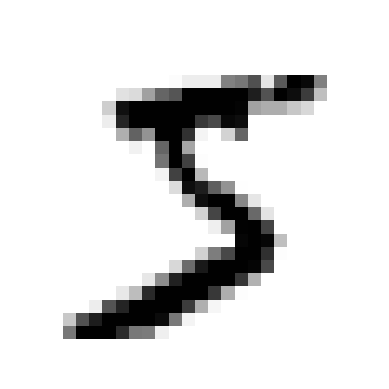

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()

In [25]:
y[0]

'5'

In [27]:
import numpy as np
y = y.astype(np.uint8)

In [28]:
y[0]

np.uint8(5)

# train and test

In [30]:
X_train, X_test , y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [31]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [32]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [47]:
dig = X.iloc[0]
sgd_clf.predict([dig])

/home/vaibhav/pr/tfod/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [45]:
import pandas as pd

In [46]:
some_dig= X.iloc[0]  # Keep it as a Series

# Make a prediction with the correct shape using a DataFrame
some_digit_df = pd.DataFrame([some_dig])  # Convert to DataFrame for prediction
prediction = sgd_clf.predict(some_digit_df)  # No warning this time
print("Predicted class:", prediction[0])

Predicted class: True


# Performance Measures

**Measuring Accuracy using Cross-Validation**

**Implementing cross-validation**

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

In [49]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [51]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


**Lets use the cross_val_score()**

In [52]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

**let's look at a vaery dumb classifier that just classifies every single image in the "not-5"class.**

In [53]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [54]:
never5_clf = Never5Classifier()
cross_val_score(never5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

It's over 90% accuracy also. because only about 10% of the images are 5s, if we always guess that an image is not a 5, you will be right about 90% of the time.

This is why accuracy is generally not the preferred preformance measure for classifiers, especially when we are deling with skewed datasets

# Confusion Matrix

In [55]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [57]:
y_train_prefect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [ ]:
a